In [2]:
import os

import xarray as xr
import matplotlib.pyplot as plt

In [3]:
obspack_dir = "/glade/work/mclong/sno-analysis/obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18/data/nc"
surface_files = [
    f"{obspack_dir}/co2_alt_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_brw_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cba_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_cgo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_kum_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_ljo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_mlo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_psa_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_smo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_spo_surface-flask_4_representative.nc",
    f"{obspack_dir}/co2_gould_shipboard-insitu_1_allvalid.nc",
]

obspack_files = {}
dsets_stn = {}
for f in surface_files:
    stn = os.path.basename(f).split('_')[1]
    obspack_files[stn] = os.path.basename(f)
    with xr.open_dataset(f) as dsi:
        dsets_stn[stn] = dsi.load() 
dsets_stn['mlo']   

<xarray.Dataset>
Dimensions:                     (obs: 975, calendar_components: 6, dim_concerns: 6, mip_nmodels: 17)
Dimensions without coordinates: obs, calendar_components, dim_concerns, mip_nmodels
Data variables: (12/30)
    time                        (obs) datetime64[ns] 1991-01-19T23:35:00 ... ...
    start_time                  (obs) datetime64[ns] 1991-01-19T23:35:00 ... ...
    midpoint_time               (obs) datetime64[ns] 1991-01-19T23:35:00 ... ...
    datetime                    (obs) |S100 b'1991-01-19T23:35:00Z' ... b'202...
    time_decimal                (obs) float64 1.991e+03 1.991e+03 ... 2.021e+03
    time_components             (obs, calendar_components) float64 1.991e+03 ...
    ...                          ...
    CT_RMSE                     (obs) float32 nan 9.266e-07 ... 5.504e-07
    CT_assim                    (obs) int32 0 1 1 1 1 1 1 1 ... 1 1 1 1 1 2 1 1
    CT_MDM                      (obs) float32 nan 8.802e-07 ... 5.229e-07
    CT_sampling_strategy        (obs) int32 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    CT_may_localize             (obs) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    CT_may_reject               (obs) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes: (12/130)
    site_code:                                    MLO
    site_name:                                    Mauna Loa, Hawaii
    site_country:                                 United States
    site_country_flag:                            UNST0001.GIF
    site_latitude:                                19.5362
    site_longitude:                               -155.5763
    ...                                           ...
    obspack_creation_date:                        2021-08-18T13:54:02.056239
    obspack_warning:                              Every effort is made to cre...
    obspack_fair_use:                             This cooperative data produ...
    obspack_usage_policy:                         www.gml.noaa.gov/ccgg/obspa...
    obspack_identifier_link:                      http://doi.org/10.25925/202...
    obspack_citation:                             Kenneth N. Schuldt, John Mu...

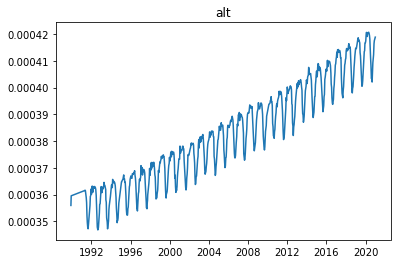

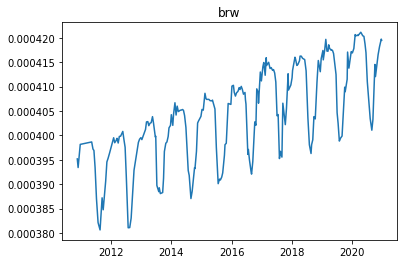

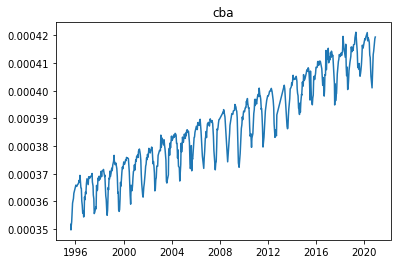

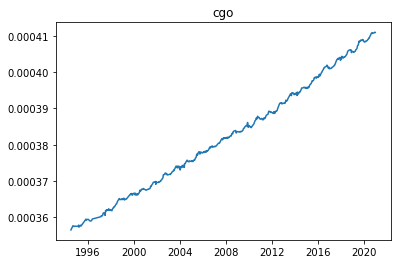

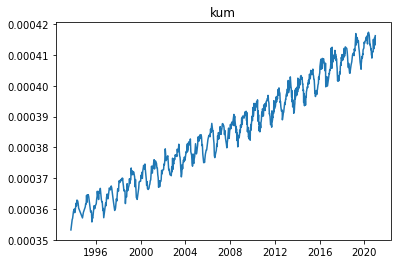

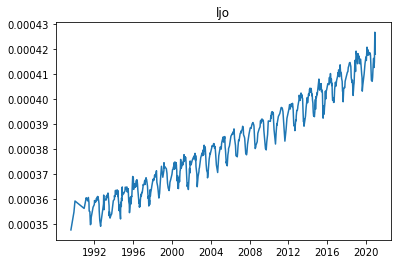

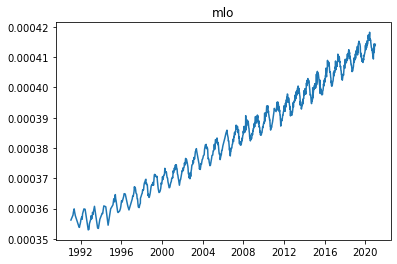

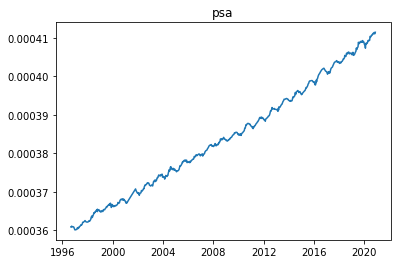

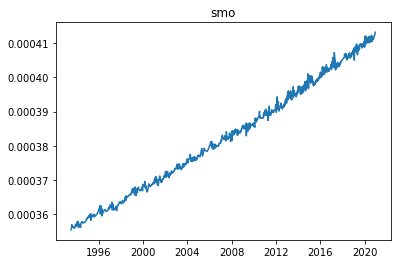

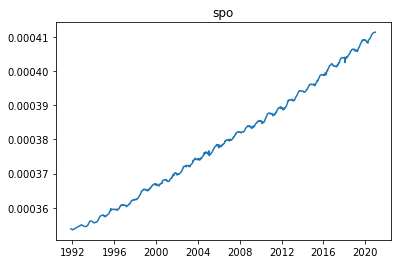

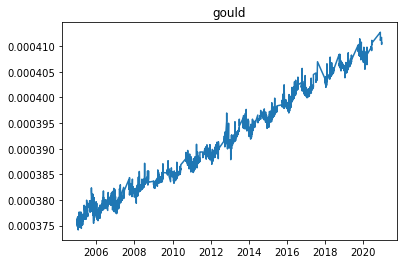

In [8]:
for key in dsets_stn.keys():
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(dsets_stn[key].time, dsets_stn[key].value)
    ax.set_title(key)